In [1]:
% matplotlib inline

In [2]:
bumgarner = 'data/518516_data.csv'
myers = 'data/571976_data.csv'
# All events for Cespedes have EV greater than 100 MPH
cespedes = 'data/493316_data.csv'
                
pitch_map = {
    'AB': 'Automatic Ball',
    'AS': 'Automatic Strike',
    'CH': 'Changeup',
    'CU': 'Curveball',
    'EP': 'Eephus',
    'FC': 'Cutter',
    'FF': 'Four-Seam Fastball',
    'FO': 'Forkball',
    'FS': 'Splitter',
    'FT': 'Two-Seam Fastball (synonymous with SI)',
    'GY': 'Gyroball',
    'IN': 'Intentional Ball',
    'KC': 'Knuckle Curve',
    'KN': 'Knuckleball',
    'NP': 'No Pitch',
    'PO': 'Pitchout',
    'SC': 'Screwball',
    'SI': 'Sinker (synonymous with FT)',
    'SL': 'Slider',
    'UN': 'Unknown',
}

In [59]:
import pandas


pandas.set_option('display.max_columns', 100)


chunks = pandas.read_csv(bumgarner, iterator=True, chunksize=100)
bumgarner_df = pandas.concat([chunk[chunk['pitch_type'] != 'null'] for chunk in chunks])
bumgarner_df.head()

,pitch_type,pitch_id,game_date,start_speed,x0,z0,player_name,batter,pitcher,events,description,spin_dir,spin_rate,break_angle,break_length,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,px,pz,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs,tfs_zulu,catcher,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,hit_speed,hit_angle,effective_speed,release_spin_rate,release_extension,game_pk
0,FF,14,2017-04-13,89.93,2.64864,5.62297,Madison Bumgarner,571448,518516,Walk,Foul,154.416,2473.28,-31.6,3.7,14,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,S,0,0,0,0,2017,5.60853,11.7135,0.989799,2.34816,null,null,518934,1,1,top,0.0,0.0,21748,2017-04-14T02:17:48Z,543148,490319,170414_021758,-6.13,-130.426,-6.05,9.6,28.98,-12.12,3.47,1.59,null,null,null,89.64,2270,6.42,490232
1,FF,15,2017-04-13,92.46,2.47658,5.65926,Madison Bumgarner,571448,518516,Walk,Ball,143.057,2453.82,-37.1,4.1,11,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,0,1,2017,7.53249,10.0164,-0.904006,3.80176,null,null,518934,1,1,top,0.0,0.0,21811,2017-04-14T02:18:11Z,543148,490319,170414_021816,-11.5,-133.916,-2.23,13.61,30.21,-14.07,3.47,1.59,null,null,null,92.55,2275,6.69,490232
2,FF,16,2017-04-13,90.74,2.79718,5.46313,Madison Bumgarner,571448,518516,Walk,Ball,151.986,2658.58,-39.5,3.7,14,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,1,1,2017,6.45632,12.1346,1.66631,1.73932,null,null,518934,1,1,top,0.0,0.0,21832,2017-04-14T02:18:32Z,543148,490319,170414_021837,-5.12,-131.637,-7.59,11.33,27.9,-10.88,3.47,1.59,null,null,null,90.58,2173,6.35,490232
3,SL,17,2017-04-13,86.62,2.55522,5.53683,Madison Bumgarner,571448,518516,Walk,Swinging Strike,178.053,1569.99,3.6,5,13,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,S,0,0,2,1,2017,0.287637,8.4537,-1.24155,1.61656,null,null,518934,1,1,top,0.0,0.0,21852,2017-04-14T02:18:52Z,543148,490319,170414_021858,-9.53,-125.523,-6,0.46,23.85,-18.6,3.47,1.59,null,null,null,86.25,2235,6.14,490232
4,CU,18,2017-04-13,79.79,2.49948,5.51428,Madison Bumgarner,571448,518516,Walk,Ball In Dirt,322.545,778.675,8,11.4,13,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,2,2,2017,-2.7955,3.64886,-2.07018,1.00501,null,null,518934,1,1,top,0.0,0.0,21921,2017-04-14T02:19:21Z,543148,490319,170414_021926,-9.59,-115.612,-2.15,-3.77,22.08,-37.1,3.47,1.59,null,null,null,78.62,2513,5.76,490232


In [60]:
bumgarner_df.dtypes

pitch_type            object
pitch_id               int64
game_date             object
start_speed           object
x0                    object
z0                    object
player_name           object
batter                 int64
pitcher                int64
events                object
description           object
spin_dir              object
spin_rate             object
break_angle           object
break_length          object
zone                  object
des                   object
game_type             object
stand                 object
p_throws              object
home_team             object
away_team             object
type                  object
hit_location           int64
bb_type                int64
balls                  int64
strikes                int64
game_year              int64
pfx_x                 object
pfx_z                 object
px                    object
pz                    object
on_3b                 object
on_2b                 object
on_1b         

In [63]:
bumgarner_df = bumgarner_df.astype({
    'start_speed': float,
    'spin_rate': float,
})

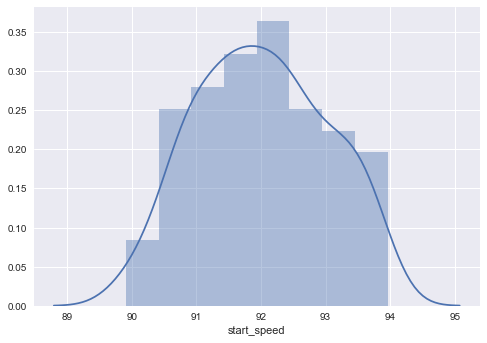

In [64]:
import seaborn


ff_df = bumgarner_df[bumgarner_df['pitch_type'] == 'FF']
seaborn.distplot(ff_df['start_speed'])

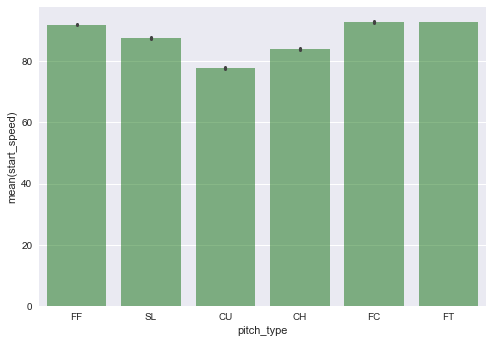

In [66]:
ax = seaborn.barplot(
    x='pitch_type',
    y='start_speed',
    data=bumgarner_df,
    color='green',
    alpha=0.5,
)

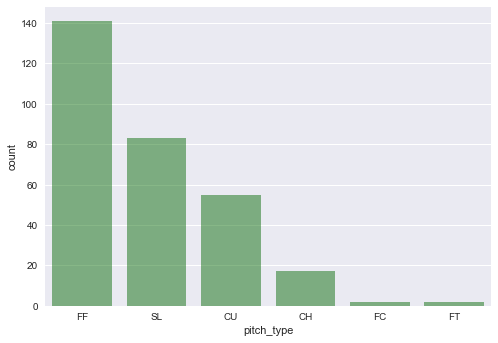

In [69]:
ax = seaborn.countplot(
    x='pitch_type',
    data=bumgarner_df,
    color='green',
    alpha=0.5,
)

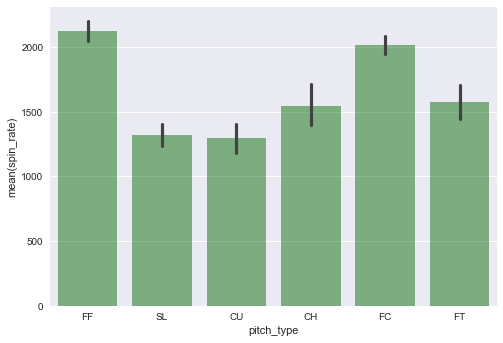

In [74]:
ax = seaborn.barplot(
    x='pitch_type',
    y='spin_rate',
    data=bumgarner_df,
    color='green',
    alpha=0.5,
)

In [94]:
strike_df = bumgarner_df[bumgarner_df['description'].str.contains('strike', case=False)]
strike_df['pitch_outcome'] = 'Strike'

ball_df = bumgarner_df[bumgarner_df['description'].str.contains('ball$', case=False)]
ball_df['pitch_outcome'] = 'Ball'

/Users/rlucioni/.pyenv/versions/3.6.1/envs/statcast/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/rlucioni/.pyenv/versions/3.6.1/envs/statcast/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


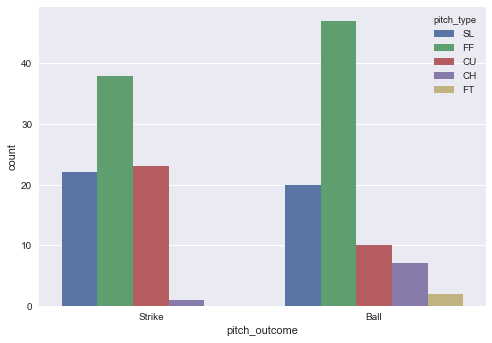

In [98]:
balls_strikes_df = pandas.concat([strike_df, ball_df])

ax = seaborn.countplot(
    x='pitch_outcome',
    hue='pitch_type',
    data=balls_strikes_df
)

In [99]:
# TODO: Heatmap of TBs or slugging "percentage" against exit velocity (EV)
# and launch angle (LA), looking for the "barrel zone."
total_bases_map = {
    'Single': 1,
    'Double': 2,
    'Triple': 3,
    'Home Run': 4,
}